Note: This Colab notebook accompanies homework assignment 6. You are required to report some answers in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

### Problem 1: Playing with estimators

(e) Numerically generate a set of $N$ samples, $S = \{x_1, \cdots, x_N\}$. Next, generate $M$ such sets $S_1, \cdots, S_M$. For each set of samples $S_i$, compute the MLE estimator $\hat{\theta}_{MLE}$. This will give $M$ different numerical estimates $\hat{\theta}_1, \cdots, \hat{\theta}_M$. Now compute the sample variance of this set of estimates $\{\hat{\theta}_1, \cdots, \hat{\theta}_M\}$. This gives us a numerical estimate $\widehat{\text{Var}}(\hat{\theta}_{MLE})$ of the variance of the MLE, $\text{Var}(\hat{\theta}_{MLE})$. Compare this numerical estimate to the Fisher information. Try different values of $N$ and $M$. For example, try $N = 10$, $M = 1000$; this should give a noisy estimate for $\hat{\theta}_{MLE}$, but since we have a large set $M$ of samples, our variance $\widehat{\text{Var}}(\hat{\theta}_{MLE})$ should be close to the true variance $\text{Var}(\hat{\theta}_{MLE})$.


In [162]:
N = 10  # samples
M = 10000  # sets

theta = 0.5  # mean = 1 / theta

smple_var_mle = np.var(
    [1/np.mean(np.random.exponential(1./theta, size=N)) for _ in range(M)])
theory_var_mle = theta**2 * N**2/(N-1)**2/(N-2)  # (theta * N/((N-1)*(N-2)))**2 # theta ** 2 / N**2
theory_crlb = theta**2/N  # theta**2 * N/(N-1)**2 # theta**2 / N
print(
    f'Estimate of the variance of MLE: {smple_var_mle:0.4f}, Variance of MLE (from theory): {theory_var_mle:0.4f}, CRLB (from theory):{theory_crlb:0.4f} ')

Estimate of the variance of MLE: 0.0390, Variance of MLE (from theory): 0.0386, CRLB (from theory):0.0250 


Task: Plot the variance of $\hat{\theta}_{MLE}$ as a function of number of sets $M$.

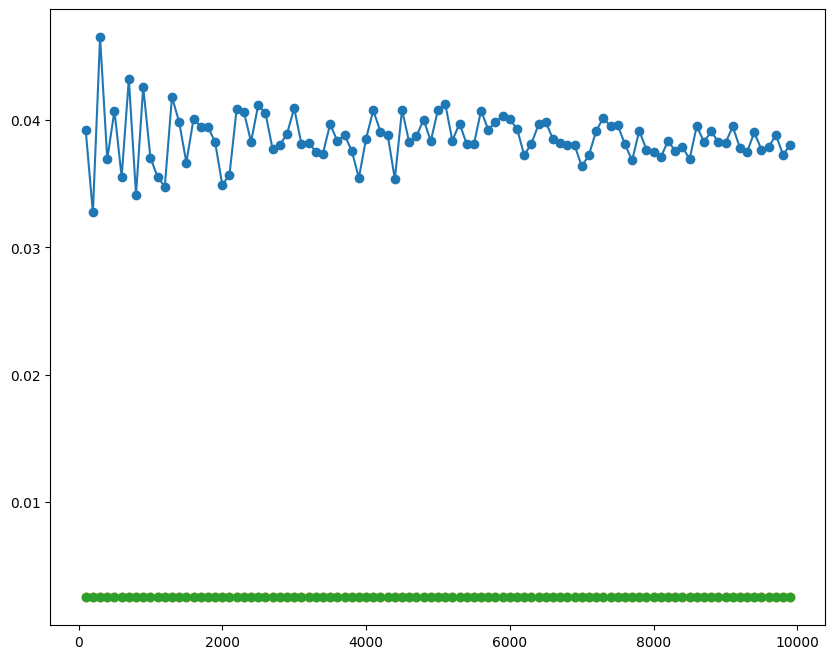

In [157]:
N = 10  # samples

theta = 0.5  # mean = 1 / theta

sample_vars, theory_vars, theory_crlbs = [], [], []

for M in range(100, 10000, 100):
    smple_var_mle = np.var(
        [1/np.mean(np.random.exponential(1./theta, size=N)) for _ in range(M)])
    theory_var_mle = theta ** 2 / N**2  # (theta * N/((N-1)*(N-2)))**2
    theory_crlb = theta**2/N**2  # theta**2 * 1/(N-1)**2

    sample_vars.append(smple_var_mle)
    theory_vars.append(theory_var_mle)
    theory_crlbs.append(theory_crlb)

plt.figure(figsize=(10, 8))
plt.plot(range(100, 10000, 100), sample_vars,
         label='Sample variance', marker='o')
plt.plot(range(100, 10000, 100), theory_vars,
         label='Theory variance', marker='o')
plt.plot(range(100, 10000, 100), theory_crlbs, label='CRLB', marker='o')
plt.show()

(f) Repeat the above problems for the MLE estimator $\hat{\mu}_{MLE}$ of the mean of the Gaussian distribution ${N}(\mu, \sigma^2)$.

In [ ]:
N = 10
M = 10000

mean = 2.0
var = 2.0


smple_var_mle = np.var(
    [np.mean(np.random.normal(mean, np.sqrt(var), size=N)) for _ in range(M)])
theory_var_mle = var/N
theory_crlb = var/N
print(
    f'Estimate of the variance of MLE: {smple_var_mle:0.4f}, Variance of MLE (from theory): {theory_var_mle:0.4f}, CRLB (from theory):{theory_crlb:0.4f} ')

Estimate of the variance of MLE: 0.2000, Variance of MLE (from theory): 0.2000, CRLB (from theory):0.2000 


Task: Plot the variance of $\hat{\theta}_{MLE}$ as a function of number of sets $M$.

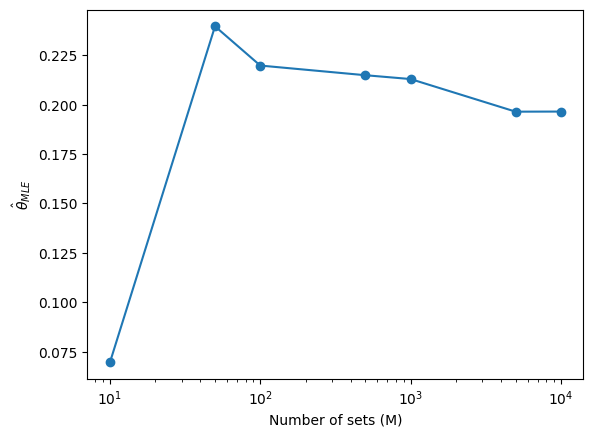

In [ ]:
Mrange = [10, 50, 100, 500, 1000, 5000, 10000]

vars = [np.var([np.mean(np.random.normal(mean, np.sqrt(var), size=N))
               for _ in range(M)]) for M in Mrange]


plt.plot(Mrange, vars, marker='o')
plt.xlabel('Number of sets (M)')
plt.ylabel('$\\hat{\\theta}_{MLE}$')
plt.xscale('log')
plt.show()

### Problem 2: Teacher student setup with Gaussian distributed noise

Consider a teacher-student setup, where the teacher generates samples $(x,y)$ with
\begin{align}
y = f^*(x) = (w^*)^T x + \epsilon ,
\end{align}
where $w^*$ is a fixed vector, $x \sim {N}(0, I_{d_{in}})$ and $\epsilon \sim $ ${N}(0,\sigma^2)$. Then, the probability distribution for $y \in \mathbb{R}$ follows ${N}(f^*(x), \sigma^2)$.

Test the lower bound numerically by considering a dataset of $N$ samples, using it to estimate the parameters of the linear model. Plot the average test loss and the Cramer-Rao lower bound for various values of N.

In [ ]:
def forward(w, x, var):
    f = x @ w
    eps = np.random.normal(loc=0, scale=np.sqrt(var), size=f.shape)
    f += eps
    return f


def mse_loss(y_hat, y):
    "MSE loss"
    return np.mean((y_hat - y)**2)

Let us generate some data $(x, y)$ such that

$$y = f(x) = w^* x + \epsilon$$

where $\epsilon \sim N(0, \sigma^2) $ and $x \in N(0, I_{d_{in}}) $.



In [ ]:
N = 10000
var = 0.01
d_in = 10

np.random.seed(42)
# data generation

x_train = np.random.normal(loc=0, scale=1.0, size=(N, d_in))
x_test = np.random.normal(loc=0, scale=1.0, size=(N, d_in))
w_star = np.random.normal(loc=0, scale=1.0,  size=(d_in, 1))

norm = np.linalg.norm(w_star)
w_star = w_star / norm

y_train = forward(w_star, x_train, var)
y_test = forward(w_star, x_test, var)

Task: Plot the average test loss and the Cramer-Rao lower bound for various values of N.

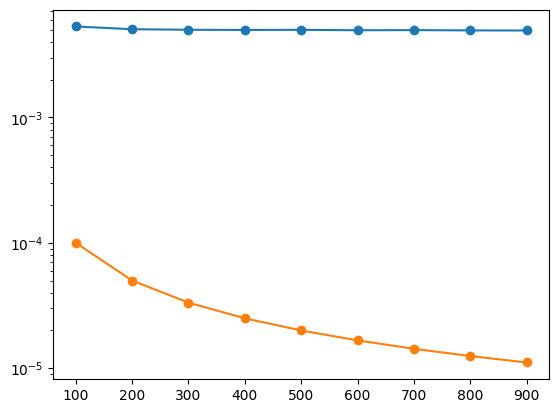

In [29]:
# data generatione ends

#opt_w = exact_solution(x_train, y_train)

test_losses, crlbs = [], []

for N in range(100, 1000, 100):
    opt_w = np.linalg.pinv(x_train[:N].T @ x_train[:N]) @ x_train[:N].T @ y_train[:N]
    pred = x_test @ opt_w
    test_losses.append(0.5*mse_loss(pred, y_test))
    crlbs.append(var/N)    

plt.plot(range(100, 1000, 100), test_losses, label='Test loss', marker='o')
plt.plot(range(100, 1000, 100), crlbs, label='CRLB', marker='o')
plt.yscale('log')
plt.show()

### Problem 3: Teacher student setup with exponentially distributed noise

Consider a teacher-student setup, where the teacher generates samples $(x,y)$ with
\begin{align}
y = (w^*)^T x + \epsilon ,
\end{align}
where $\epsilon$ has an exponential distribution, $p(\epsilon) = \frac{1}{2} \theta  e^{- \theta | \epsilon |}$.

In [72]:
def forward_exp(w, x, scale):
    sign = (np.random.normal(size = (N, 1)) > 0)
    eps = sign*np.random.exponential(scale = scale, size = (N, 1)) / 2
    f = x * w + eps
    return  f

N = 1000
scale = 0.1

# data generation
np.random.seed(43)

x_train = np.random.uniform(low = -1.0, high = 1.0, size = (N, 1))
x_test = np.random.uniform(low = -1.0, high = 1.0, size = (N, 1))
w_star = np.random.normal(size = 1)

y_train = forward_exp(w_star, x_train, scale)
y_test = forward_exp(w_star, x_test, scale)

# data generation ends

(a) Perform linear regression assuming a MSE loss, and compute the generalization error.

In [52]:
opt_w = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train
pred = x_test @ opt_w

test_loss_mse = 0.5 * np.mean((y_test-pred)**2)
print(f'Test loss (MSE): {test_loss_mse:0.4f}')

Test loss (MSE): 0.0013


(c)  Now perform linear regression using the loss derived from maximum likelihood, and compute the generalization error. Hint: Use sub-gradient decent.

How does the generalization error, in this case, compare to the case where MSE loss was used?

In [ ]:
# Loss = \sum_{i=1}^n |y_i - f(x_i)|

def gradient(x):
    if np.all(x == 0.0):
        return 0.0
    else:
        return np.sign(x)


def MLE_GD(x_train, y_train, lr=1e-2, N=1000):
    opt_w = np.random.normal(size=1)

    for _ in range(N):
        opt_w -= lr * (gradient(x_train * opt_w - y_train).T @ x_train)[0]
    return opt_w


opt_w = MLE_GD(x_train, y_train, lr=5e-5, N=10000)

test_loss_mle = np.abs(x_test * opt_w - y_test).mean()
print(f'Test loss (MSE): {test_loss_mle:0.4f}')

[0.50820792]
Test loss (MSE): 0.0277


### Problem 4: Family of estimators

We saw that the naive sample variance $\hat{\sigma}^2_{naive} = \frac{1}{N} \sum_{i=1}^N (X_i - (\frac{1}{N}\sum_{i=1}^N X_i))^2$ is a biased estimator of the sample variance. Then we saw that an unbiased estimator of the variance includes the Bessel correction, $\hat{\sigma}^2_{unbiased} = \frac{1}{N-1} \sum_{i=1}^N (X_i - (\frac{1}{N}\sum_{i=1}^N X_i))^2$. But just because it is unbiased, is it the best that we can do? Let us consider a family of estimators
\begin{align}
    \hat{\sigma}^2_A = \frac{1}{A} \sum_{i=1}^N \left(X_i - \left(\frac{1}{N}\sum_{i=1}^N X_i \right ) \right)^2 .
\end{align}

Suppose that we want an estimator $\hat{\sigma}^2_A$ that minimizes the mean squared error $\mathbb{E}[(\hat{\sigma}_A^2 - \sigma^2)^2 ]$. For normally distributed random numbers, $X \sim {N}(0, \sigma^2)$, find the optimal value of $A$ numerically.

[[np.int64(7), np.float64(0.45371246408824517)], [np.int64(8), np.float64(0.30044230018445706)], [np.int64(9), np.float64(0.22499634176896888)], [np.int64(10), np.float64(0.19221100154767717)], [np.int64(11), np.float64(0.18361567459709877)], [np.int64(12), np.float64(0.18898536873423735)], [np.int64(13), np.float64(0.20242774893024504)]]
optimal A: 11


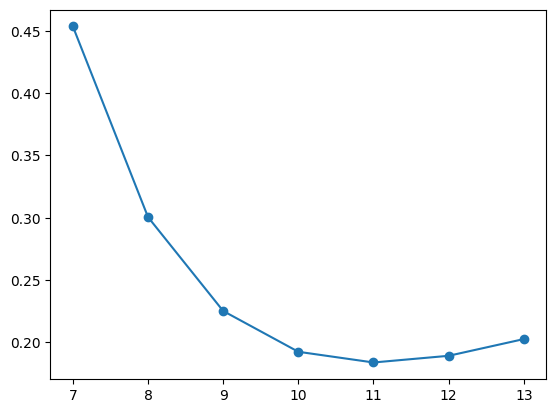

In [89]:
N = 10 # Size of the sample
M = 10000 # Number of samples
var = 1.0 # variance of the Gaussian distribution
np.random.seed(24)

Avalues = N + np.arange(-3, 4)

sigmas = []

X = np.random.normal(0, np.sqrt(var), (M, N))

for A in Avalues:
    sig = 1/A * np.array([np.sum((X[i,:] - np.mean(X[i,:]))**2) for i in range(M)])

    sigmas.append([A, np.mean((sig-var)**2)])

print(sigmas)
print(f'optimal A: {np.argmin(np.array(sigmas)[:,1])+7}')

plt.plot(np.array(sigmas)[:,0], np.array(sigmas)[:,1], marker='o')
plt.show()


### Problem 5: James-Stein estimator

The James-Stein estimator is an estimator for the mean of a multi-variate Gaussian distribution. More specifically, let $X$ be an $m$-component random variable, meaning $X$ takes values in $\mathbb{R}^m$. The $m$-dimensional Gaussian distribution is
\begin{align}
    p(x) = (2\pi \sigma^2)^{-m/2} e^{- \frac{||x - \mu||^2}{2\sigma^2}} . 
\end{align}
The mean is an $m$-component vector $\mu \in \mathbb{R}^m$, and we take the covariance matrix to be diagonal, with $\sigma^2$ the variance of each component. $|| \cdot ||$ refers to the $L_2$ norm. 

The formula for the James-Stein estimator is
\begin{align}
    \hat{\mu}_{JS} = \left(1 - \frac{(m-2) \sigma^2}{||X||^2}\right) X.
\end{align}


Generate a sample of $X$ and compute the JS estimator numerically. Now generate $N$ such samples. Using the estimator of the variance $\hat{\sigma}^2$ instead of $\sigma^2$ in Eqn. \ref{eqn:js}, show empirically that, on average, the James-Stein estimator is closer to the true mean than the MLE. 

Task: Plot the mean-squared errors, $\mathbb{E} (\mu_{MLE}) - \mu)^2$ and $\mathbb{E} (\mu_{JS}) - \mu)^2$, as a function of the dimension $m$.

[np.float64(0.9786084050184727), np.float64(1.0022691240841244), np.float64(1.043426427835124), np.float64(0.9805862283825636), np.float64(1.0081316774222413), np.float64(0.9705640460108034), np.float64(1.0372341385353707), np.float64(0.9891264960818951), np.float64(0.9945746483600344), np.float64(1.021746786741194), np.float64(0.9874740959707249), np.float64(1.0085966742381804), np.float64(0.9992010476798001), np.float64(0.9965374662325073), np.float64(1.0003399307527185), np.float64(0.9944276012038042), np.float64(0.9896546950790177), np.float64(1.0031994818574028), np.float64(1.0049383501058022)]
[np.float64(0.9786084050184727), np.float64(0.6406293112448691), np.float64(0.4999152734821762), np.float64(0.40619934354460885), np.float64(0.3509242045332546), np.float64(0.27263015896689957), np.float64(0.23519711454362857), np.float64(0.2222659831669506), np.float64(0.20404869306572665), np.float64(0.18513329376381876), np.float64(0.16344491346342688), np.float64(0.1567049855669814), np

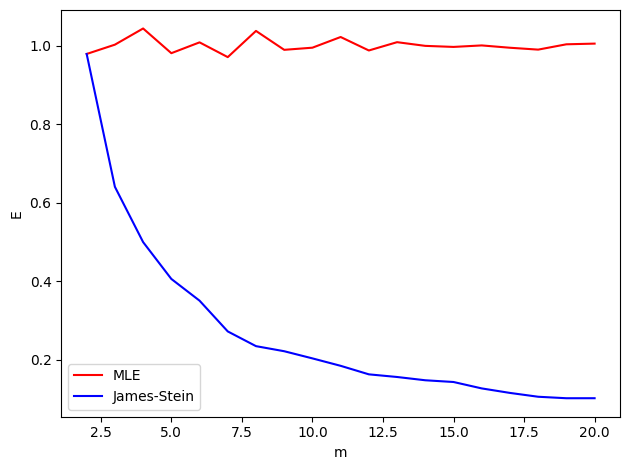

In [ ]:
N = 1000
var = 1.0

np.random.seed(42)

mrange = np.arange(2, 21)  # range of m values to be considered

mle = []
js = []


for m in mrange:
    rand = np.random.normal(loc=0.0, scale=np.sqrt(var), size=(N, m))

    mu_js = (1 - (m-2)*var/np.linalg.norm(rand, axis=-1)**2)[:, None] * rand

    mle.append(np.mean(np.mean((rand-0)**2, axis=-1), axis=0))
    js.append(np.mean(np.mean((mu_js - 0)**2, axis=-1), axis=0))

print(mle)
print(js)

plt.plot(mrange, mle, label='MLE', color='red')
plt.plot(mrange, js, label='James-Stein', color='blue')

# plt.yscale('log')

plt.xlabel('m')
plt.ylabel('E')
plt.tight_layout()
plt.legend()
plt.show()

### Problem 6: Experimenting with bias and variance for polynomial regression

In this problem, we will compute the bias and variance in the polynomial regression problem with samples ($x, y$) generated using the relation

\begin{align}
   y = 2x^3 - x^2 + x + 1 +  \eta,  
\end{align}

where $\eta \sim N(0, 1)$ is random noise.

Randomly generate a training dataset $S$ of size $N$ and a test example $(x', y')$.
Fit a $p$ degree polynomial, $f_{p, S}(x)$, to the randomly generated set $S$ and evaluate it on the test example $(x', y')$. Repeat this process $K$ times and estimate the bias $\left(\mathbb{E}_{S, (x', y')} [f_{p, S}(x') - y'] \right) ^2 $ and variance $\mathbb{E}_{S, (x', y')} [ f_{p, S}(x') - \mathbb{E}_{S, (x', y')} f_{p, S}(x')  ]^2$. Repeat this for different values of $p$. Plot the bias, variance, and test loss as a function of the degree $p$.


In [ ]:
"Generate datset with a cubic relationship between X and Y"


def cubic_func(x, n_samples):
    y = 2*(x**3) - x**2 + x + 1
    return y + np.random.randn(n_samples, 1)


def generate_cubic_dataset(N, M):
    # Generate training dataset
    x_train = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
    y_train = cubic_func(x_train, N)

    # Generate test dataset
    x_test = np.random.uniform(low=-1.1, high=1.1, size=(M, 1))
    y_test = cubic_func(x_test, M)

    return (x_train, y_train), (x_test, y_test)


def mse(y, y_preds):
    return np.mean((y - y_preds)**2)

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(43)
N = 100  # number of training examples
M = 1  # number of test examples
K = 10**4  # number of averages

# results = list()

biases, variances, train_losses, test_losses = [], [], [], []

for p in tqdm(range(1, 11)):

    y_train_pred, y_test_pred, train_loss, test_loss = [], [], [], []

    for k in range(K):

        (x_train, y_train), (x_test, y_test) = generate_cubic_dataset(N, M)
        poly = PolynomialFeatures(degree=p, include_bias=True)
        poly_features = poly.fit_transform(x_train)
        model = LinearRegression()
        model.fit(poly_features, y_train)
        test_features = poly.fit_transform(x_test)

        y_train_pred.append(model.predict(poly_features))
        y_test_pred.append(model.predict(test_features))

        train_loss.append(0.5*np.mean((y_train_pred-y_train)**2))
        test_loss.append(0.5*np.mean((y_test_pred-y_test)**2))

    biases.append((np.mean(y_test_pred, axis=0) - np.mean(y_test))**2)
    variances.append(
        np.mean((y_test_pred - np.mean(y_test, keepdims=True, axis=(0, 1)))**2))
    train_losses.append(train_loss[-1])
    test_losses.append(test_loss[-1])


results = [range(1, 11), np.array(biases).ravel(),
           variances, train_losses, test_losses]

results = np.array(results).T


df = pd.DataFrame(results, columns=[
                  'p', 'bias', 'variance', 'train_loss', 'test_loss'])
print(df)

100%|██████████| 10/10 [06:42<00:00, 40.20s/it]

      p       bias   variance  train_loss  test_loss
0   1.0   0.008730   1.972744    2.254422   0.986372
1   2.0   0.725948   2.802002    2.425813   1.401001
2   3.0   0.295010   3.083141    2.429738   1.541570
3   4.0   0.013481   2.808261    2.740715   1.404130
4   5.0   0.446288   3.280081    2.372934   1.640040
5   6.0   0.063174   3.017923    2.872839   1.508962
6   7.0   0.995808   4.484671    2.397250   2.242335
7   8.0   0.043323   4.380592    2.868314   2.190296
8   9.0  13.311491  18.573620    2.497526   9.286810
9  10.0   0.562181  10.296268    2.351352   5.148134


Task: Plot the bias, variance and the test loss as a function of the degree of the polynomial.

<Axes: xlabel='p', ylabel='bias'>

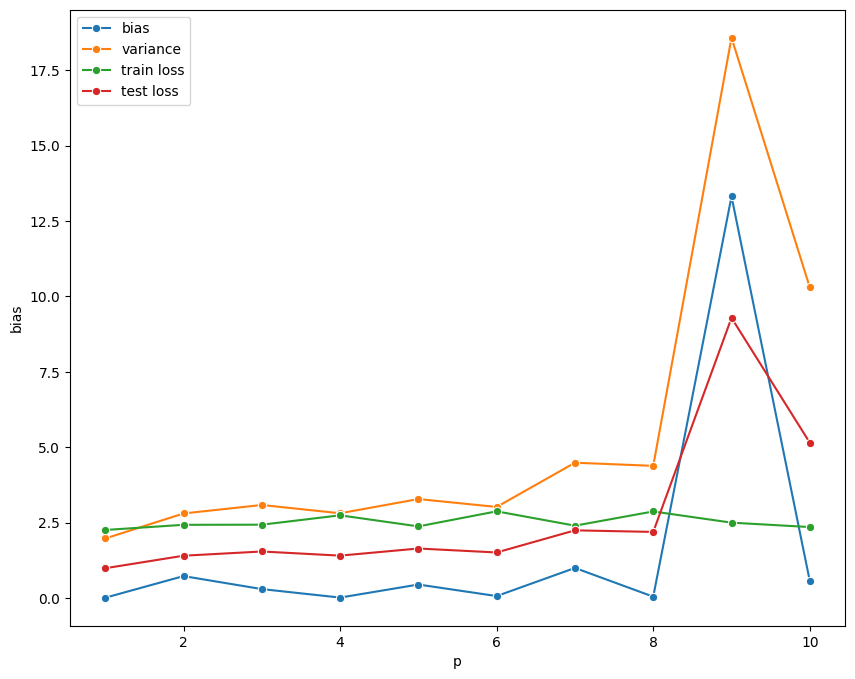

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(x='p', y='bias', data=df, label='bias', marker='o', ax=ax)
sns.lineplot(x='p', y='variance', data=df, label='variance', marker='o', ax=ax)
sns.lineplot(x='p', y='train_loss', data=df,
             label='train loss', marker='o', ax=ax)
sns.lineplot(x='p', y='test_loss', data=df,
             label='test loss', marker='o', ax=ax)

### Problem 7: Sample-wise Double descent in linear regression

In this problem, we will demonstrate the sample-wise double descent phenomenon for linear regression for synthetic dataset consisting of $(x, y)$ pairs related as

\begin{align}
  y = W x + \epsilon,  
\end{align}

where $x \sim \mathcal{N}(0, I_{d_{in}})$ , $ \epsilon \sim \mathcal{N}(0, \sigma^2)$ with $\sigma = 0.1$.

Generate subsets of the training dataset of size $n$ and fit a linear model to this subset using the exact solution to linear regression with MSE loss. Next, plot the test loss as a function of  $n$ , and mark the underparameterized and overparameterized regimes.


In [ ]:
def generate_dataset(seed, dims, n_samples):
    """Generates random data"""
    d_in, d_out = dims
    np.random.seed(seed)
    # generate a fixed w
    w = np.random.normal(loc=0, scale=1.0, size=(d_in, d_out))
    norm_w = np.linalg.norm(w, axis=0)
    w = w / norm_w

    # generate input examples for the test and training dataset
    # x_train = np.random.uniform(low = -1.0, high = 1.0, size = (n_samples, d_in))
    x_train = np.random.multivariate_normal(
        mean=np.zeros(d_in), cov=np.eye(d_in), size=(n_samples, ))

    # x_test = np.random.uniform(low = -1.0, high = 1.0, size = (n_samples, d_in))
    x_test = np.random.multivariate_normal(
        mean=np.zeros(d_in), cov=np.eye(d_in), size=(n_samples, ))

    # generate outputs
    y_train = x_train @ w
    y_train += np.random.normal(loc=0.0, scale=0.1, size=y_train.shape)
    y_test = x_test @ w
    y_test += np.random.normal(loc=0.0, scale=0.1, size=y_train.shape)

    return (x_train, y_train), (x_test, y_test), w

Let us generate a dataset consisting of $N = 1500$ examples and $d_{in}=10$.

In [ ]:
d_in = 1000
d_out = 1
n_samples = 1500

(x_train, y_train), (x_test, y_test), w_star = generate_dataset(
    seed=42, dims=(d_in, d_out), n_samples=n_samples)

Task: Generate subsets of the training dataset of size $n$, fit a linear model to the subset using an exact solution.

In [141]:
from sklearn.linear_model import LinearRegression


n_values = np.arange(500, n_samples+1, 10), np.arange(d_in -
                                                      10 + 1, d_in, 1), np.arange(d_in + 1, d_in + 10, 1)
n_values = np.concatenate(n_values)

results = list()

for n in tqdm(n_values):
    # create a subset of X
    x, y = x_train[:n, :], y_train[:n, :]

    model = LinearRegression()
    model.fit(x, y)
    pred = model.predict(x_test)

    results.append(0.5*np.mean((pred - y_test)**2))

results = np.array(results)

100%|██████████| 119/119 [00:21<00:00,  5.51it/s]


Task: Next, plot the test loss as a function of $n$, and mark the underparameterized and overparameterized regimes.

(-0.1, 5.0)

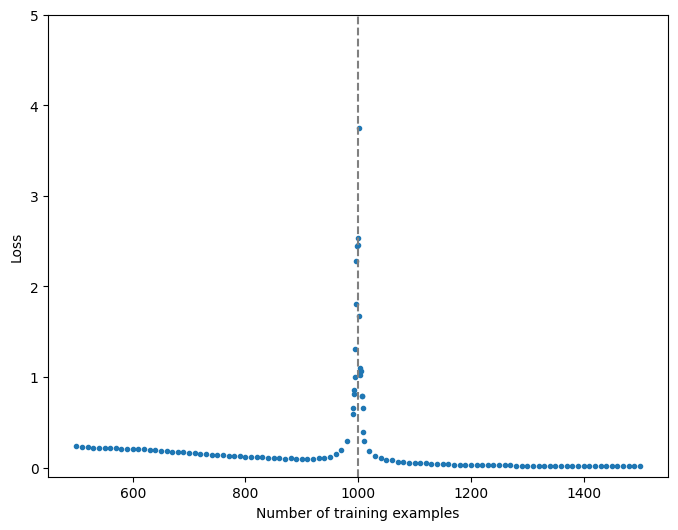

In [ ]:
# df = pd.DataFrame(results, columns = ['n', 'train_loss', 'test_loss', 'bias_weights', 'var_weights'])

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax = sns.scatterplot(x = 'n', y = 'train_loss', data = df, label = 'Train loss', ax = ax, marker = '.')
# ax = sns.scatterplot(x = 'n', y = 'test_loss', data = df, label = 'Test loss', ax = ax, marker = 'X')
ax.scatter(n_values, results, marker='.')
ax.axvline(x=d_in, linestyle='dashed', color='gray')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Loss')
ax.set_ylim(-0.1, 5)

We observe a sharp peak in the test loss at $n=d_{in}= 1000$.